In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
def dN(x):
    '''Probability density function of standard normal random variable x'''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

def N(d):
    ''' Cumulative density function of standard normal random variable x'''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function'''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)
          * (T - t)) / (sigma * math.sqrt(T - t))
    return d1

def BSM_call_value(St, K, t, T, r, sigma):
    '''Calculates Black-Scholes-Merton European call option value'''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2)
    return call_value

In [3]:
# Model and Option Parameters
K = 8000  # strike price
T = 1.0  # time-to-maturity
r = 0.025  # constant, risk-less short rate
vol = 0.2  # constant volatility

# Sample Data Generation
S = np.linspace(4000, 12000, 150)  # vector of index level values
h = np.maximum(S - K, 0)  # inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S]

Text(0, 0.5, 'present value $C(t=0)$')

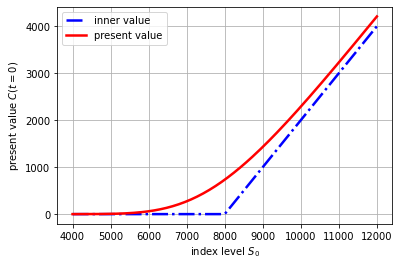

In [4]:
plt.figure()
plt.plot(S, h, 'b-.', lw=2.5, label='inner value')
# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')
# plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')